In [15]:
import pandas as pd
import numpy as np
import seaborn as sb
from scipy import stats
import random
import matplotlib.pyplot as plt
from geohash2 import decode_exactly

In [3]:
!ls

Untitled.ipynb test.csv       train.csv


In [7]:
df = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/bike.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
id           1048575 non-null int64
unique_id    1048575 non-null object
car_id       1048575 non-null int64
bike_type    1048575 non-null int64
time         1048575 non-null object
lat          1048575 non-null float64
lng          1048575 non-null float64
center       1048575 non-null object
distance     1048575 non-null int64
createdAt    1048575 non-null object
updatedAt    1048575 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 88.0+ MB


In [23]:
df.lng.max(), df.lng.min(), df.lat.max(), df.lat.min()

(121.6590225, 121.3261686, 31.37167887, 31.10827132)

In [ ]:
# 人民广场：121.481707,31.239699
# 南京东路：121.491508,31.243288
# 西藏中路：121.484869,31.2345
# 河南中路：121.493286,31.236793

In [20]:
test = df.loc[(df.lat<31.239699)&(df.lat>31.2345)&(df.lng<121.3359696)&(df.lng>121.3261686)]
len(test.car_id.unique())

172

In [2]:
from math import radians, tan, atan, sin, cos, acos
def calcDistance(Lat_A, Lng_A, Lat_B, Lng_B):
    '''
    input Lat_A 纬度A
    input Lng_A 经度A
    input Lat_B 纬度B
    input Lng_B 经度B
    output distance 距离(km)
'''
    ra = 6378.140  # 赤道半径 (km)
    rb = 6356.755  # 极半径 (km)
    flatten = (ra - rb) / ra  # 地球扁率
    rad_lat_A = radians(Lat_A)
    rad_lng_A = radians(Lng_A)
    rad_lat_B = radians(Lat_B)
    rad_lng_B = radians(Lng_B)
    pA = atan(rb / ra * tan(rad_lat_A))
    pB = atan(rb / ra * tan(rad_lat_B))
    xx = acos(sin(pA) * sin(pB) + cos(pA) * cos(pB) * cos(rad_lng_A - rad_lng_B))
    c1 = (sin(xx) - xx) * (sin(pA) + sin(pB)) ** 2 / cos(xx / 2) ** 2
    c2 = (sin(xx) + xx) * (sin(pA) - sin(pB)) ** 2 / sin(xx / 2) ** 2
    dr = flatten / 8 * (c1 - c2)
    distance = ra * (xx + dr)
    return distance

In [51]:
def calcManhattan(Lat_A, Lng_A, Lat_B, Lng_B):
    if Lat_A == Lat_B or Lng_A == Lng_B:
        #print('by1')
        return calcDistance(Lat_A, Lng_A, Lat_B, Lng_B)
    else:
        #print('by2')
        horiz = calcDistance(Lat_A, Lng_A, Lat_A, Lng_B)
        verti = calcDistance(Lat_A, Lng_B, Lat_B, Lng_B)
        return (horiz**2+verti**2)**0.5

In [44]:
# calculate the edge length of the area, then get the density of bicycles in this area
calcManhattan(121.6790225, 31.37167887, 121.6590225, 31.10827132)

by2


15.596325952066666

In [45]:
calcDistance(121.6790225, 31.37167887, 121.6590225, 31.10827132)

15.592011886738868

In [30]:
calcDistance(121.3261686, 31.37167887, 121.6590225, 31.37167887)

37.07542508331029

In [22]:
len(df.car_id.unique())

308837

In [31]:
#density of sharing bicycles in Shanghai: 540
308837/15.42769770986269/37.07542508331029

539.9357271096242

In [140]:
df1 = pd.read_csv('train.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214096 entries, 0 to 3214095
Data columns (total 7 columns):
orderid                int64
userid                 int64
bikeid                 int64
biketype               int64
starttime              object
geohashed_start_loc    object
geohashed_end_loc      object
dtypes: int64(4), object(3)
memory usage: 171.7+ MB


In [87]:
df1.head()

,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc
0,1893973,451147,210617,2,2017-05-14 22:16:50,wx4snhx,wx4snhj
1,4657992,1061133,465394,1,2017-05-14 22:16:52,wx4dr59,wx4dquz
2,2965085,549189,310572,1,2017-05-14 22:16:51,wx4fgur,wx4fu5n
3,4548579,489720,456688,1,2017-05-14 22:16:51,wx4d5r5,wx4d5r4
4,3936364,467449,403224,1,2017-05-14 22:16:50,wx4g27p,wx4g266


In [141]:
start = [[float(x[0]), float(x[1])] for x in list(map(decode_exactly, df1.geohashed_start_loc))]
end = [[float(x[0]), float(x[1])] for x in list(map(decode_exactly, df1.geohashed_end_loc))]
start[:5], end[:5]

([[40.10353088378906, 116.28959655761719],
  [39.79042053222656, 116.32530212402344],
  [39.88243103027344, 116.54228210449219],
  [39.76570129394531, 116.16325378417969],
  [39.96345520019531, 116.38847351074219]],
 [[40.10078430175781, 116.28684997558594],
  [39.79728698730469, 116.32255554199219],
  [39.87556457519531, 116.55189514160156],
  [39.76570129394531, 116.16188049316406],
  [39.95933532714844, 116.38160705566406]])

In [142]:
start, end = np.array(start), np.array(end)

In [143]:
df1['start_lat'], df1['start_lng'], df1['end_lat'], df1['end_lng'] = start[:,0], start[:,1], end[:,0], end[:,1]
df1.head()

,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc,start_lat,start_lng,end_lat,end_lng
0,1893973,451147,210617,2,2017-05-14 22:16:50,wx4snhx,wx4snhj,40.103531,116.289597,40.100784,116.286850
1,4657992,1061133,465394,1,2017-05-14 22:16:52,wx4dr59,wx4dquz,39.790421,116.325302,39.797287,116.322556
2,2965085,549189,310572,1,2017-05-14 22:16:51,wx4fgur,wx4fu5n,39.882431,116.542282,39.875565,116.551895
3,4548579,489720,456688,1,2017-05-14 22:16:51,wx4d5r5,wx4d5r4,39.765701,116.163254,39.765701,116.161880
4,3936364,467449,403224,1,2017-05-14 22:16:50,wx4g27p,wx4g266,39.963455,116.388474,39.959335,116.381607


In [144]:
df1.drop(labels=['geohashed_start_loc', 'geohashed_end_loc'], axis=1, inplace=True)
df1.head()

,orderid,userid,bikeid,biketype,starttime,start_lat,start_lng,end_lat,end_lng
0,1893973,451147,210617,2,2017-05-14 22:16:50,40.103531,116.289597,40.100784,116.286850
1,4657992,1061133,465394,1,2017-05-14 22:16:52,39.790421,116.325302,39.797287,116.322556
2,2965085,549189,310572,1,2017-05-14 22:16:51,39.882431,116.542282,39.875565,116.551895
3,4548579,489720,456688,1,2017-05-14 22:16:51,39.765701,116.163254,39.765701,116.161880
4,3936364,467449,403224,1,2017-05-14 22:16:50,39.963455,116.388474,39.959335,116.381607


In [92]:
max(df1.start_lat), min(df1.start_lat), max(df1.start_lng), min(df1.start_lng)

(40.65559387207031, 20.017776489257812, 122.12471008300781, 102.65556335449219)

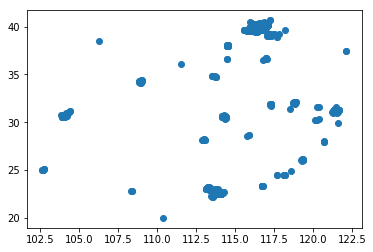

In [93]:
plt.scatter(df1.start_lng, df1.start_lat)

In [94]:
# 116.742814,40.062839， 116.08511,39.782626
test = df1.loc[(df1.start_lat<40.062839)&(df1.start_lat>39.782626)&(df1.start_lng<116.742814)&(df1.start_lng>116.08511)]
len(test.bikeid.unique())

436954

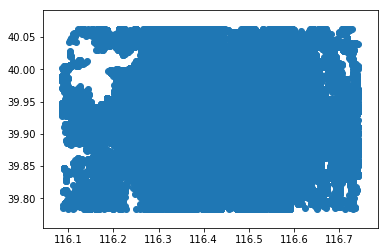

In [95]:
plt.scatter(test.start_lng, test.start_lat)

In [96]:
# calculate the edge length of the area, then get the density of bicycles in this area
calcDistance(116.742814, 40.062839, 116.742814, 39.782626)

14.074118917312232

In [97]:
calcDistance(116.742814, 40.062839, 116.08511, 40.062839)

73.31482238257593

In [98]:
436954/14.074118917312232/73.31482238257593

423.4700657831928

In [99]:
test.head()

,orderid,userid,bikeid,biketype,starttime,start_lat,start_lng,end_lat,end_lng
1,4657992,1061133,465394,1,2017-05-14 22:16:52,39.790421,116.325302,39.797287,116.322556
2,2965085,549189,310572,1,2017-05-14 22:16:51,39.882431,116.542282,39.875565,116.551895
4,3936364,467449,403224,1,2017-05-14 22:16:50,39.963455,116.388474,39.959335,116.381607
5,5163705,917620,509044,1,2017-05-14 22:16:53,39.993668,116.470871,39.988174,116.464005
7,495333,185893,67441,1,2017-05-14 22:16:53,39.966202,116.277237,39.964828,116.274490


In [145]:
test['distance'] = list(map(calcManhattan, test.start_lat, test.start_lng, test.end_lat, test.end_lng))
test.head()

,orderid,userid,bikeid,biketype,starttime,start_lat,start_lng,end_lat,end_lng,distance
1,4657992,1061133,465394,1,2017-05-14 22:16:52,39.790421,116.325302,39.797287,116.322556,0.797859
2,2965085,549189,310572,1,2017-05-14 22:16:51,39.882431,116.542282,39.875565,116.551895,1.121351
4,3936364,467449,403224,1,2017-05-14 22:16:50,39.963455,116.388474,39.959335,116.381607,0.743931
5,5163705,917620,509044,1,2017-05-14 22:16:53,39.993668,116.470871,39.988174,116.464005,0.846102
7,495333,185893,67441,1,2017-05-14 22:16:53,39.966202,116.277237,39.964828,116.274490,0.279847


In [129]:
test = test.loc[(test.distance<15)]

In [138]:
test.distance = test.distance/2

In [130]:
test.distance.max()

14.989393258890205

In [146]:
#Manhattan
test.distance.mean()

0.8064264338729599

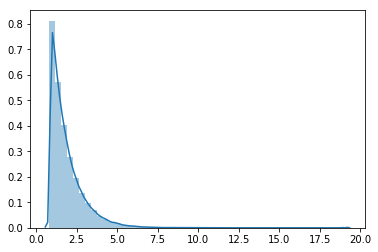

In [125]:
exp = [random.expovariate(1/1.0371615615596175) for x in range(436954)]
exp = [x for x in exp if x > 0.8]
sb.distplot(exp)

In [58]:
np.average(exp)

0.8137596211308362

[]

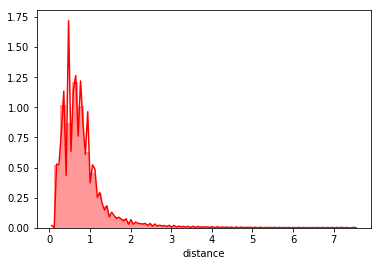

In [147]:
sb.distplot(test.distance, color='r')
#sb.distplot(exp)
plt.plot()

In [107]:
?stats.kstest

In [136]:
stats.ks_2samp(test.distance, exp)

Ks_2sampResult(statistic=0.22802504185672617, pvalue=0.0)

In [123]:
stats.kstest(test.distance, cdf='expon')

KstestResult(statistic=0.37159183457895134, pvalue=0.0)

In [109]:
test.distance.mean()

0.8140867129047269

In [103]:
#average time of each trip
test.distance.mean() * 4

3.2563468516189076

In [148]:
1500000/6341

236.55574830468382